# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Saya memilih dataset dari Kaggle dengan judul **Heart Disease Data for Health Research**

2. **Penjelasan Dataset**:   
   Dataset ini berisi berbagai indikator kesehatan dan faktor risiko yang berkaitan dengan penyakit jantung. Parameter seperti usia, jenis kelamin, tekanan darah, kadar kolesterol, kebiasaan merokok, dan pola olahraga telah dikumpulkan untuk menganalisis risiko penyakit jantung dan berkontribusi pada penelitian kesehatan. Dataset ini dapat digunakan oleh para profesional kesehatan, peneliti, dan analis data untuk memeriksa tren yang berkaitan dengan penyakit jantung, mengidentifikasi faktor risiko, dan melakukan berbagai analisis terkait kesehatan.


# **2. Import Library**

In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# **3. Memuat Dataset**

In [4]:
file_path = 'heart.csv'
df = pd.read_csv(file_path)
display(df.head())

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
print(f"Dimensi Data: {df.shape}")

Dimensi Data: (10000, 21)


In [7]:
display(df.describe().round(2))

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.00,9981.00,9970.00,9978.00,9975.00,9974.00,9978.00,9974.00,9980.00
mean,49.30,149.76,225.43,29.08,6.99,250.73,120.14,7.47,12.46
std,18.19,17.57,43.58,6.31,1.75,87.07,23.58,4.34,4.32
min,18.00,120.00,150.00,18.00,4.00,100.00,80.00,0.00,5.00
25%,34.00,134.00,187.00,23.66,5.45,176.00,99.00,3.67,8.72
50%,49.00,150.00,226.00,29.08,7.00,250.00,120.00,7.47,12.41
75%,65.00,165.00,263.00,34.52,8.53,326.00,141.00,11.26,16.14
max,80.00,180.00,300.00,40.00,10.00,400.00,160.00,15.00,20.00


/tmp/ipython-input-2944674051.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease Status', data=df, palette='viridis')


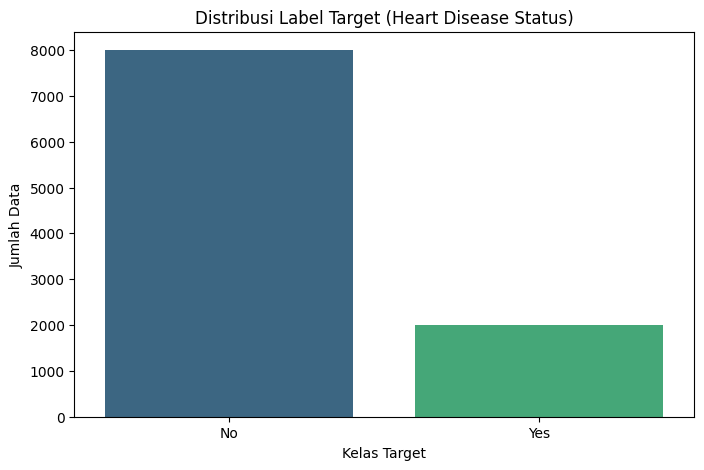

In [8]:
# Univariate Analysis

target_column = 'Heart Disease Status'

plt.figure(figsize=(8, 5))
sns.countplot(x='Heart Disease Status', data=df, palette='viridis')
plt.title(f'Distribusi Label Target ({'Heart Disease Status'})')
plt.xlabel('Kelas Target')
plt.ylabel('Jumlah Data')
plt.show()

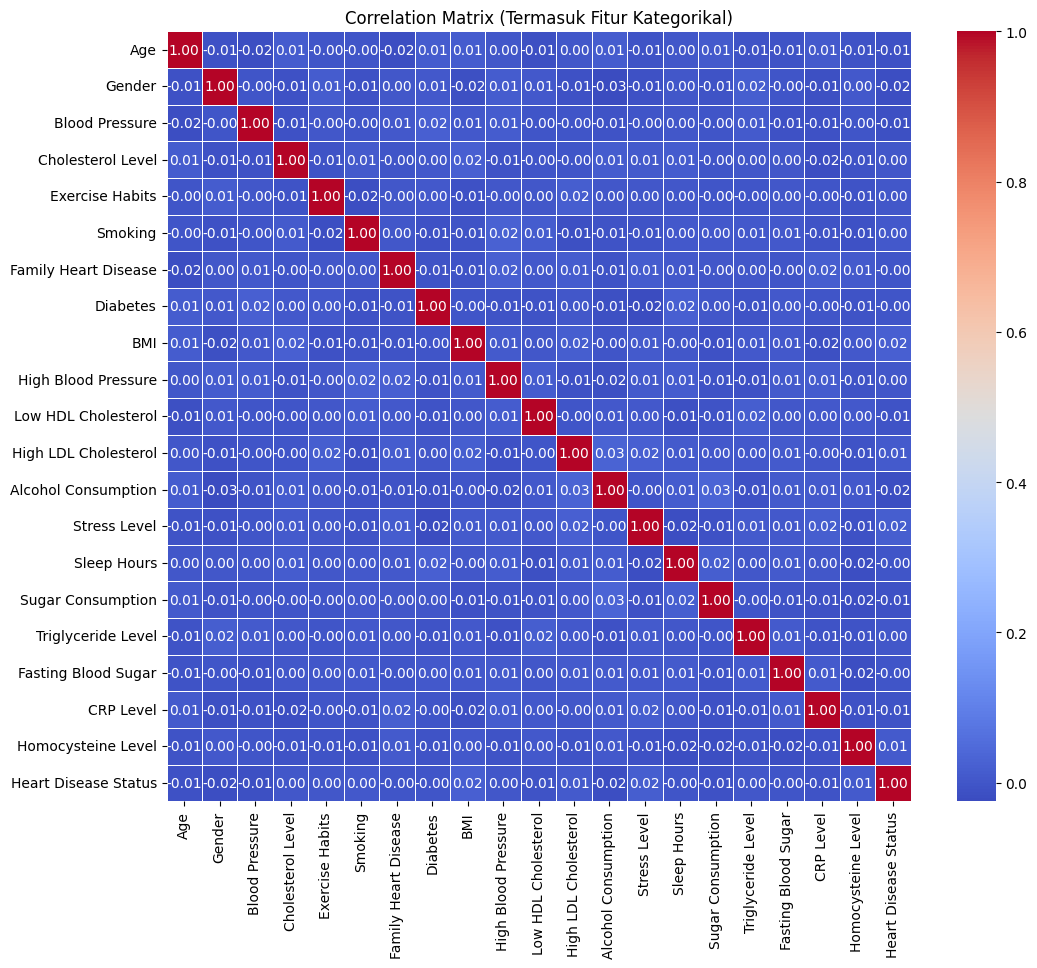

In [9]:
# Multivariate Analysis (Heatmap Korelasi)

plt.figure(figsize=(12, 10))

# Membuat copy dataframe agar data asli tidak terganggu
df_eda = df.copy()

label_encoder = LabelEncoder()
for col in df_eda.select_dtypes(include=['object']).columns:
    df_eda[col] = label_encoder.fit_transform(df_eda[col])

correlation_matrix = df_eda.corr()

# Membuat Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix (Termasuk Fitur Kategorikal)')
plt.show()

# **5. Data Preprocessing**

In [10]:
df_clean = df.copy()
awal = len(df_clean)

In [11]:
# Menghapus Duplikat
df_clean = df_clean.drop_duplicates()

In [12]:
# Menghapus Data yang Kosong
df_clean = df_clean.dropna()

In [13]:
print(f"Data awal: {awal} baris")
print(f"Data setelah cleaning: {len(df_clean)} baris")

Data awal: 10000 baris
Data setelah cleaning: 7067 baris


In [14]:
# Menentukan Kolom Target
target_col = 'Heart Disease Status'

# Memisahkan Kolom Fitur dan Target
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

In [15]:
# Melakukan Encoding
X_encoded = pd.get_dummies(X, drop_first=True)
y_encoded = y.map({'Yes': 1, 'No': 0})

In [16]:
# Melakukan Scalling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [17]:
# Menyatukan Kolom Kembali untuk Disimpan
df_final = pd.DataFrame(X_scaled, columns=X_encoded.columns)
df_final['target'] = y_encoded.reset_index(drop=True)

In [18]:
# Menyimpan File di Colab
output_folder = 'data_clean'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

output_filename = f'{output_folder}/heart_clean.csv'
df_final.to_csv(output_filename, index=False)

print(f"File bersih tersimpan di: {output_filename}")
print("\nStatistik Data Bersih:")
display(df_final.describe().round(2))

File bersih tersimpan di: data_clean/heart_clean.csv

Statistik Data Bersih:


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,target
count,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,...,7067.00,7067.0,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.00,7067.0
mean,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,...,-0.00,-0.0,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.2
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.4
min,-1.71,-1.70,-1.72,-1.76,-1.70,-1.73,-1.69,-1.71,-1.73,-1.01,...,-1.01,-1.0,-0.98,-0.71,-0.72,-0.70,-0.72,-0.72,-0.69,0.0
25%,-0.84,-0.90,-0.87,-0.86,-0.87,-0.86,-0.89,-0.88,-0.86,-1.01,...,-1.01,-1.0,-0.98,-0.71,-0.72,-0.70,-0.72,-0.72,-0.69,0.0
50%,-0.02,0.01,-0.02,0.00,-0.00,-0.01,0.00,-0.00,-0.00,0.99,...,0.99,1.0,-0.98,-0.71,-0.72,-0.70,-0.72,-0.72,-0.69,0.0
75%,0.86,0.92,0.86,0.86,0.88,0.87,0.89,0.86,0.85,0.99,...,0.99,1.0,1.02,1.41,1.40,1.42,1.39,1.39,1.45,0.0
max,1.68,1.71,1.73,1.75,1.72,1.72,1.70,1.73,1.75,0.99,...,0.99,1.0,1.02,1.41,1.40,1.42,1.39,1.39,1.45,1.0


In [19]:
# Trigger Download File di Colab
from google.colab import files
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>